In [1]:
import math
import random

from pysorteddict import SortedDict

sorted_dict_lens = [100, 1_000, 10_000, 100_000, 1_000_000, 10_000_000]


def setup(sorted_dict_len: int, seed: float = math.pi) -> SortedDict:
    random.seed(seed)
    d = SortedDict()
    for _ in range(sorted_dict_len):
        d[random.random()] = random.random()
    return d

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use("light.mplstyle")


def plot(df: pd.DataFrame, logy: bool = False, title: str = ""):
    fig, ax = plt.subplots()
    df.plot(
        ax=ax,
        logx=True,
        logy=logy,
        xlabel="Sorted Dictionary Length",
        xlim=(sorted_dict_lens[0] // 10, sorted_dict_lens[-1] * 10),
        ylabel="Average Execution Time, s",
    )
    ax.grid(which='major', linewidth=0.5, linestyle=':')
    ax.grid(which='minor', linewidth=0.0625, linestyle='-')
    ax.minorticks_on()
    ax.legend(prop={"family": "JetBrains Mono"})
    ax.set_title(title, fontname="JetBrains Mono")
    plt.show()

# `__contains__`

In [ ]:
df = pd.DataFrame(index=sorted_dict_lens, columns=["0.00 in d", "0.33 in d", "0.66 in d", "1.00 in d"])
for i, sorted_dict_len in enumerate(sorted_dict_lens):
    print(f"{sorted_dict_len=}")
    d = setup(sorted_dict_len)
    for j, key in enumerate([0.00, 0.33, 0.66, 1.00]):
        bench = %timeit -o key in d
        df.iat[i, j] = bench.average

In [ ]:
plot(df, "__contains__")

# `__iter__`

In [3]:
df = pd.DataFrame(index=sorted_dict_lens, columns=["for _ in d: pass"])
for i, sorted_dict_len in enumerate(sorted_dict_lens):
    d = setup(sorted_dict_len)
    %timeit -v bench for _ in d: pass
    df.iloc[i] = bench.average

777 ns ± 17.6 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
8.05 μs ± 65.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
147 μs ± 599 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.94 ms ± 878 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
117 ms ± 16.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.23 s ± 7.62 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


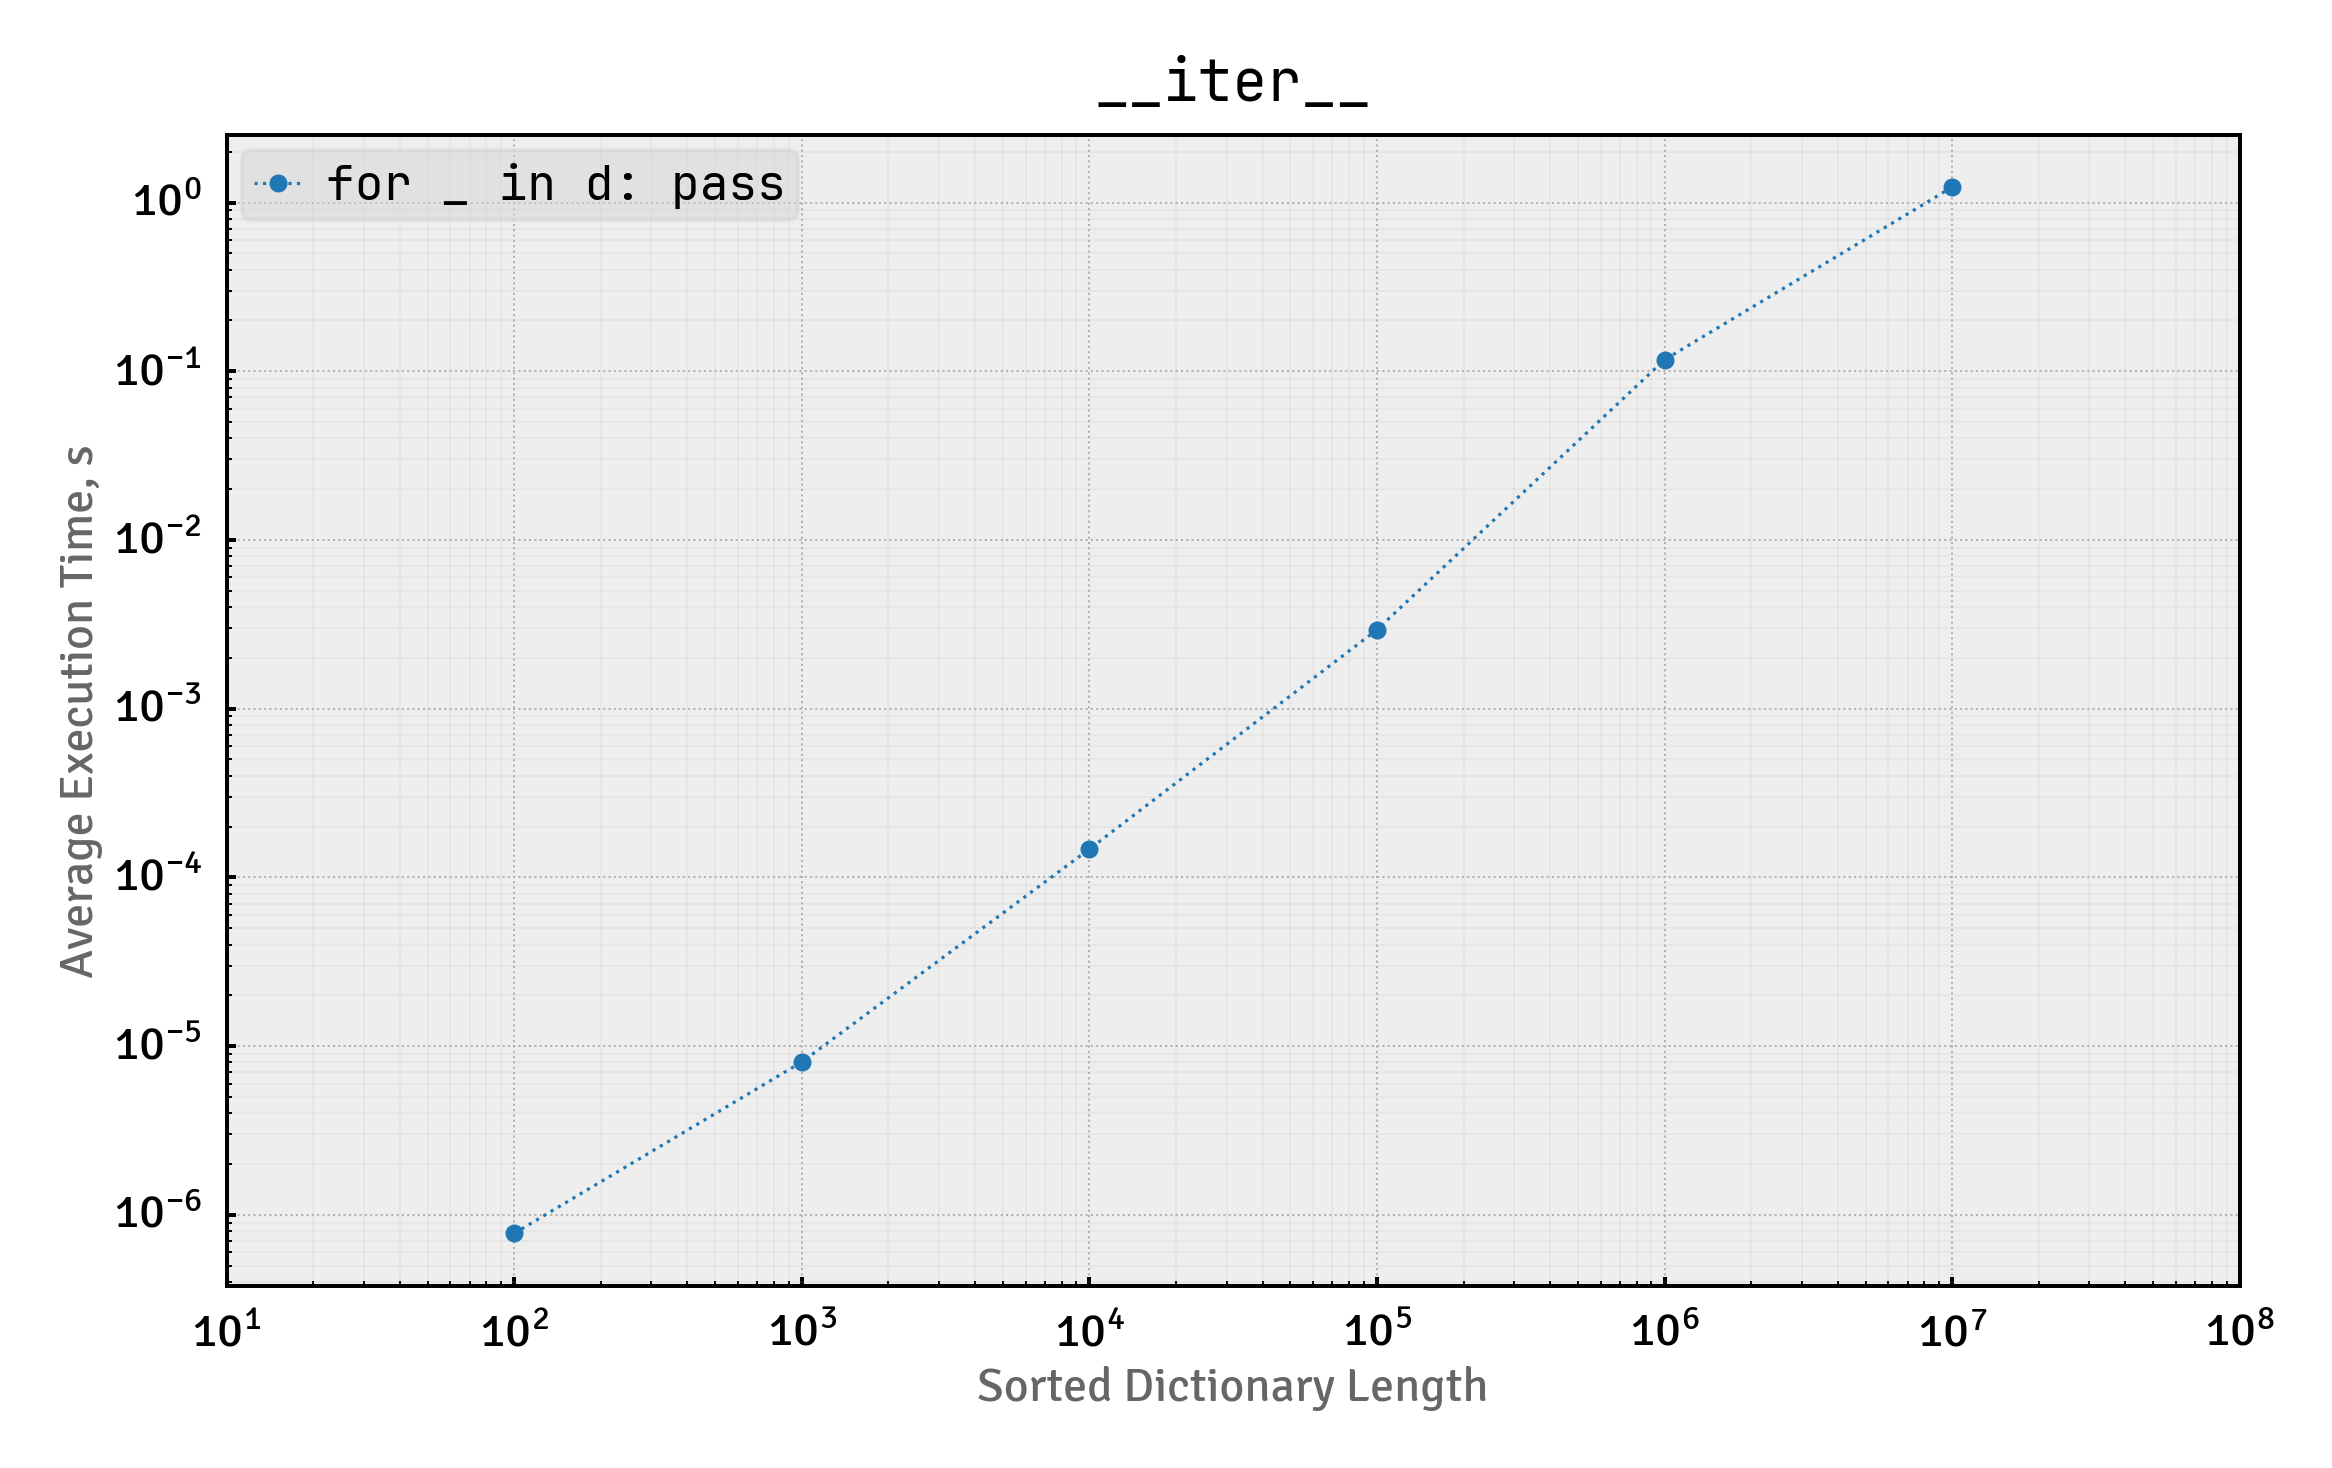

In [4]:
plot(df, logy=True, title="__iter__")